In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv(r"C:\projects_endtoend\phishing_classification\Data\Phishing URL dataset\Phishing URLs.csv")

In [3]:
df2 = pd.read_csv(r"C:\projects_endtoend\phishing_classification\Data\Phishing URL dataset\URL dataset.csv")

In [4]:
df1.head()

,url,Type
0,https://docs.google.com/presentation/d/e/2PACX...,Phishing
1,https://btttelecommunniccatiion.weeblysite.com/,Phishing
2,https://kq0hgp.webwave.dev/,Phishing
3,https://brittishtele1bt-69836.getresponsesite....,Phishing
4,https://bt-internet-105056.weeblysite.com/,Phishing


In [5]:
df2.head()

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate


In [6]:
df1.shape

(54807, 2)

In [7]:
df2.shape

(450176, 2)

In [8]:
df1['Type'].value_counts()

Phishing    54807
Name: Type, dtype: int64

In [9]:
df2['type'].value_counts()

legitimate    345738
phishing      104438
Name: type, dtype: int64

In [10]:
df1.rename(columns={'url':'URL','Type':'type'}, inplace=True)
df2.rename(columns={'url':'URL'}, inplace=True)

In [11]:
data = pd.concat([df1,df2], axis=0, ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
data.shape

(504983, 2)

In [13]:
data.columns

Index(['URL', 'type'], dtype='object')

In [14]:
data.head()

,URL,type
0,http://rhbtradesmart.co.id/wp-content/themes/d...,phishing
1,http://bbs.due-dili.com/common/Centro,phishing
2,https://www.eripplescebu.com/,legitimate
3,http://www.saequity.com/wp-includes/SimplePie/...,phishing
4,https://www.museesmontreal.org/main.php?l=e&d=...,legitimate


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504983 entries, 0 to 504982
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     504983 non-null  object
 1   type    504983 non-null  object
dtypes: object(2)
memory usage: 7.7+ MB


In [16]:
data.describe(include='all')

,URL,type
count,504983,504983
unique,504933,3
top,https://storage.cloud.google.com/1lordman1man3...,legitimate
freq,3,345738


In [17]:
data.nunique()

URL     504933
type         3
dtype: int64

In [18]:
data['type'].value_counts()

legitimate    345738
phishing      104438
Phishing       54807
Name: type, dtype: int64

In [19]:
data['type'] = data['type'].str.lower()

In [20]:
data['type'].value_counts()

legitimate    345738
phishing      159245
Name: type, dtype: int64

In [21]:
data.isna().sum()

URL     0
type    0
dtype: int64

In [22]:
data.duplicated().sum()

50

In [23]:
data.drop_duplicates(inplace=True)

In [24]:
data.duplicated().sum()

0

In [25]:
data.shape

(504933, 2)

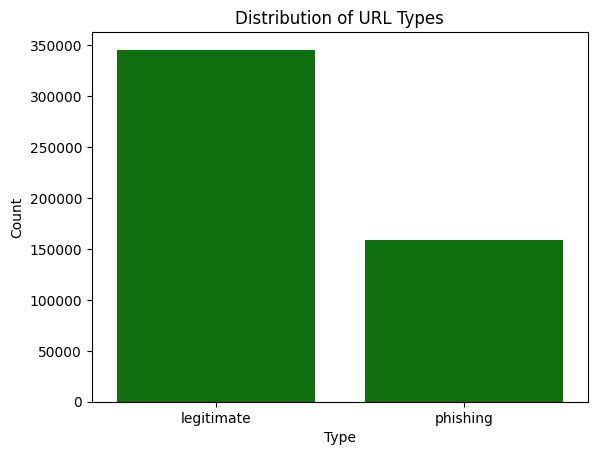

In [26]:
sns.barplot(x=data['type'].value_counts().index, y=data['type'].value_counts().values, color='green')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of URL Types')
plt.show()

# Preprocessing

In [27]:
data['type'] = data['type'].map({'legitimate':0, 'phishing':1})

In [28]:
data = data.rename(columns={'type':'label'})

In [29]:
data.head()

,URL,label
0,http://rhbtradesmart.co.id/wp-content/themes/d...,1
1,http://bbs.due-dili.com/common/Centro,1
2,https://www.eripplescebu.com/,0
3,http://www.saequity.com/wp-includes/SimplePie/...,1
4,https://www.museesmontreal.org/main.php?l=e&d=...,0


In [30]:
import string
string.punctuation

import re

In [31]:
def extract_features(df):

    df = df.copy()

    # Feature 1: Length of URL
    df['url_length'] = df['URL'].apply(len)

    # Feature 2: Count of special characters
    df['special_char_count'] = df['URL'].apply(lambda x: sum(i in string.punctuation for i in x))

    # Feature 3: Count of digits in URL
    df['digit_count'] = df['URL'].apply(lambda x: sum(i.isdigit() for i in x))

    # Feature 4: subdomain count in URL
    df['subdomain_count'] = df['URL'].apply(lambda x: x.count('.'))

    # Feature 5: is domain an IP address
    df["is_ip"] = df["URL"].apply(lambda x: 1 if re.match(r"(\d{1,3}\.){3}\d{1,3}", x) else 0)

    # Feature 6: Presence of 'https' in URL
    df['has_https'] = df['URL'].apply(lambda x: 1 if 'https' in x else 0)

    return df

data = extract_features(data)

In [32]:
data.head()

,URL,label,url_length,special_char_count,digit_count,subdomain_count,is_ip,has_https
0,http://rhbtradesmart.co.id/wp-content/themes/d...,1,61,11,0,3,0,0
1,http://bbs.due-dili.com/common/Centro,1,37,8,0,2,0,0
2,https://www.eripplescebu.com/,0,29,6,0,2,0,1
3,http://www.saequity.com/wp-includes/SimplePie/...,1,109,20,1,3,0,0
4,https://www.museesmontreal.org/main.php?l=e&d=...,0,61,15,3,3,0,1


In [33]:
data.columns

Index(['URL', 'label', 'url_length', 'special_char_count', 'digit_count',
       'subdomain_count', 'is_ip', 'has_https'],
      dtype='object')

In [34]:
data.isna().sum()

URL                   0
label                 0
url_length            0
special_char_count    0
digit_count           0
subdomain_count       0
is_ip                 0
has_https             0
dtype: int64

In [35]:
data.duplicated().sum()

0

In [36]:
X = data.drop('label',axis=1)
y = data['label']

## Model Building

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
X_train.shape

(403946, 7)

In [40]:
X_test.shape

(100987, 7)

## Vectorization

In [41]:
vectorizer = TfidfVectorizer(max_features=1000,analyzer='char',ngram_range=(2,5))

url_train = X_train['URL']
url_test = X_test['URL']

X_train_vectorized = vectorizer.fit_transform(url_train)
X_test_vectorized = vectorizer.transform(url_test)

print("X_train shape:", X_train.shape)
print("X_train_vectorized shape:", X_train_vectorized.shape)


X_train shape: (403946, 7)
X_train_vectorized shape: (403946, 1000)


## Scaling the data

In [42]:
scaler = StandardScaler()

num_train = X_train.select_dtypes(include=['int64', 'float64'])
num_test = X_test.select_dtypes(include=['int64', 'float64'])

num_train_scaled = scaler.fit_transform(num_train)
num_test_scaled = scaler.transform(num_test)

print("Numerical features shape:", num_train_scaled.shape)


Numerical features shape: (403946, 6)


In [43]:
from scipy.sparse import hstack

X_train_final = hstack([X_train_vectorized, num_train_scaled])
X_test_final = hstack([X_test_vectorized, num_test_scaled])

In [44]:
X_train_final.shape

(403946, 1006)

In [45]:
data['label'].value_counts()

0    345738
1    159195
Name: label, dtype: int64

In [47]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, class_weight='balanced', solver='saga', n_jobs=-1, tol=1e-3),
    'Random Forest': RandomForestClassifier(class_weight='balanced',n_estimators=20,random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBClassifier(n_estimators=20, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=20, random_state=42)
}

In [48]:
accuracy = []
precision = []
recall = []

best_model = None
best_model_name = None
best_recall = 0
best_cm = None

for model_name, model in models.items():
    print(f"\n --- {model_name} ---")
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("Confusion Matrix:\n", cm)

    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)

    # check if this model has the best recall so far
    if rec > best_recall:
        best_recall = rec
        best_model = model
        best_model_name = model_name
        best_cm = cm

    print("="*60)

print(f"\n Best Model based on Recall: {best_model_name}")
print(f"Recall: {best_recall:.4f}")
print("Confusion Matrix of Best Model:\n", best_cm)


 --- Logistic Regression ---


c:\projects_endtoend\phishing_classification\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.9781060928634379
Precision: 0.99268325129706
Recall: 0.9374666289770407
Confusion Matrix:
 [[68928   220]
 [ 1991 29848]]

 --- Random Forest ---
Accuracy: 0.996048996405478
Precision: 0.9964315038211331
Recall: 0.9910173058199064
Confusion Matrix:
 [[69035   113]
 [  286 31553]]

 --- XGBoost ---
Accuracy: 0.9957420262013923
Precision: 0.9960830148150488
Recall: 0.990389145387732
Confusion Matrix:
 [[69024   124]
 [  306 31533]]

 --- Gradient Boosting ---
Accuracy: 0.994197272916316
Precision: 0.995685963521015
Recall: 0.9858663902760765
Confusion Matrix:
 [[69012   136]
 [  450 31389]]

 Best Model based on Recall: Random Forest
Recall: 0.9910
Confusion Matrix of Best Model:
 [[69035   113]
 [  286 31553]]


In [52]:
best_model

RandomForestClassifier(class_weight='balanced', n_estimators=20, n_jobs=-1,
                       random_state=42)

## Testing on Unseen data 1

In [53]:
# Example manual URLs
test_urls = [
    # Legitimate
    "https://www.google.com/search?q=phishing",
    "https://www.microsoft.com/en-us",
    "https://www.amazon.in/gp/cart/view.html",
    "https://github.com/openai/gpt",
    "https://www.wikipedia.org/",

    # Phishing-like
    "http://login.google.verify-account-security.com/update",
    "http://paypal.com.user-login.secure.verify.account.1234.cn",
    "https://amaz0n-login-checkout.xyz/secure",
    "http://192.168.1.50/paypal/verify",
    "https://secure-bank-login-update.top/online"
]

# Convert to DataFrame (match with training format)
test_df = pd.DataFrame(test_urls, columns=["URL"])

# Apply same feature engineering as training
X_manual = extract_features(test_df)

# Predict with trained model

X_manual_tfidf = vectorizer.transform(X_manual["URL"])
X_manual_scales = scaler.transform(X_manual.select_dtypes(include=['int64', 'float64']))
X_manual_final = hstack([X_manual_tfidf, X_manual_scales])
manual_preds = best_model.predict(X_manual_final)

# Show results
for url, pred in zip(test_urls, manual_preds):
    print(f"{url} --> {'Legitimate (0)' if pred==0 else 'Phishing (1)'}")


https://www.google.com/search?q=phishing --> Legitimate (0)
https://www.microsoft.com/en-us --> Legitimate (0)
https://www.amazon.in/gp/cart/view.html --> Legitimate (0)
https://github.com/openai/gpt --> Phishing (1)
https://www.wikipedia.org/ --> Legitimate (0)
http://login.google.verify-account-security.com/update --> Phishing (1)
http://paypal.com.user-login.secure.verify.account.1234.cn --> Phishing (1)
https://amaz0n-login-checkout.xyz/secure --> Phishing (1)
http://192.168.1.50/paypal/verify --> Phishing (1)
https://secure-bank-login-update.top/online --> Phishing (1)


## Testing on Unseen data2

In [54]:
test_urls = [
            "https://www.google.com/search?q=data+science",
            "http://login.paypal.com.account-update.net/login.html",
            "https://github.com/scikit-learn/scikit-learn",
            "https://www.wikipedia.org/wiki/Phishing",
            "https://secure-apple.com.secure-login-12.com/account-verify/",
            "http://216.58.192.142/bank/login.php",
            "https://www.ebay-security-payment-info.com/signin/",
            "https://www.youtube.com/watch?v=dQw4w9WgXcQ"
        ]

# Convert to DataFrame (match with training format)
test_df = pd.DataFrame(test_urls, columns=["URL"])

# Apply same feature engineering as training
X_manual = extract_features(test_df)

# Predict with trained model

X_manual_tfidf = vectorizer.transform(X_manual["URL"])
X_manual_scales = scaler.transform(X_manual.select_dtypes(include=['int64', 'float64']))
X_manual_final = hstack([X_manual_tfidf, X_manual_scales])
manual_preds = best_model.predict(X_manual_final)

# Show results
for url, pred in zip(test_urls, manual_preds):
    print(f"{url} --> {'Legitimate (0)' if pred==0 else 'Phishing (1)'}")


https://www.google.com/search?q=data+science --> Legitimate (0)
http://login.paypal.com.account-update.net/login.html --> Phishing (1)
https://github.com/scikit-learn/scikit-learn --> Phishing (1)
https://www.wikipedia.org/wiki/Phishing --> Legitimate (0)
https://secure-apple.com.secure-login-12.com/account-verify/ --> Phishing (1)
http://216.58.192.142/bank/login.php --> Phishing (1)
https://www.ebay-security-payment-info.com/signin/ --> Legitimate (0)
https://www.youtube.com/watch?v=dQw4w9WgXcQ --> Legitimate (0)
